# DisCoPy as a general, programmatic diagramming tool

DisCoPy is a Python toolkit for building diagrams using principles from the mathematics of *category theory*.

<div class="alert alert-block alert-info">
<b>Comforting words:</b></br> 
You do not need to understand category theory to use DisCoPy
in the basic way that I am about to describe.
</div>

The purpose of this document is to demonstrate how it can used and explain why it might be of interest to technical authors specifically.
    
For detailed background and more sophisticated examples refer to the [official docs](https://docs.discopy.org/en/main/index.html).

# Types and boxes

Many systems, processes and structures can be represented by combinations of arrows and boxes.

In DisCoPy, things or objects are called `Types` and these can be inputs and outputs for `Boxes`.

A box can be thought of as an event, process or function.

Before making any diagrams we need import these classes.

In [267]:
from discopy.symmetric import Ty, Box

# Input and output

A simple process consists of a single step that takes an input and returns an output.

Here the `input` and `output` are instantiated as types using `Ty()`.
A process called "processOne" is defined with `Box()` that takes the input and returns the output.
This is stored in a variable that is passed to `draw()` to render the diagram.

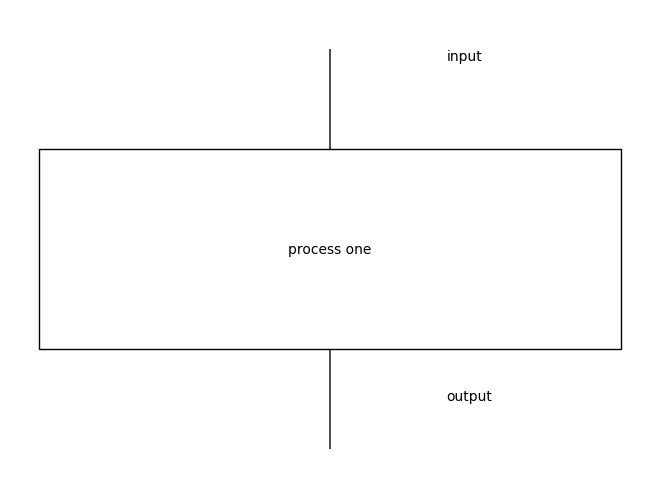

In [268]:
input, output = Ty('input'), Ty('output')

processOne = Box('process one', input, output)

processOne.draw()

# Composing Diagrams

A key aspect of DisCoPy is that a given diagram can be thought of as a module. It can be composed together with others to create more complex diagrams, as long as the composition is logical.

If a second process `processTwo` is defined it can be connected to the first in series using the `>>` operator.
This new process can be stored in a new variable `combinedProcess` and drawn.

The resultant process takes the output from the first step
and transforms it back to the input: not so useful but good enough for now!

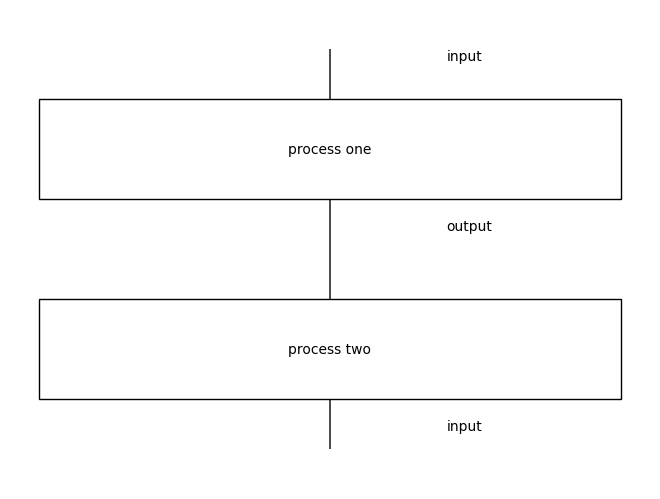

In [269]:
processTwo = Box('process two', output, input)

combinedProcess = processOne >> processTwo

combinedProcess.draw()

Another operator — `@` — enables us to represent types and boxes in parallel.

Two separate processes, $processOne: input \to output$ and $processTwo: output \to input$,
can be represented as parallel processes using the code below:

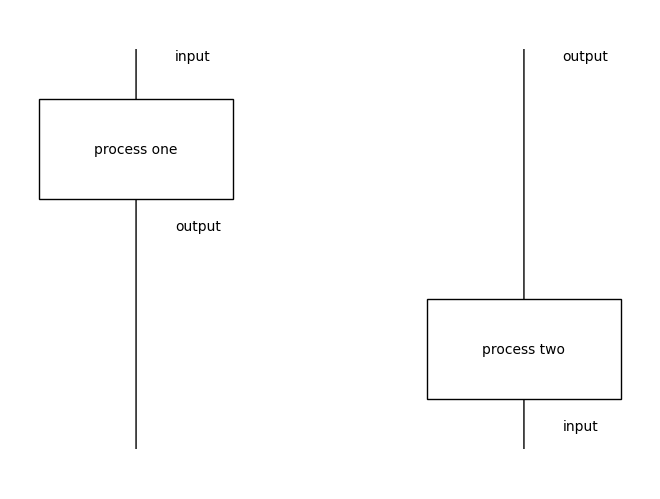

In [270]:
parallelProcesses = processOne @ processTwo

parallelProcesses.draw()

<div class="alert alert-block alert-info">
<b>Math alert:</b></br> 
If you want to (you don't have to) it is possible to describe any of these diagrams as equations.
For example:

1. $processOne: input \to output$
2. $processTwo: output \to input$
3. $processOne \cdot processTwo: input \to input$
4. $processOne \otimes processTwo: input \otimes output \to output \otimes input$
</div>

# Proof and Logic

After creating these diagrams it is possible to leverage some of Python's built-in functionality.

For example, we can do an `assert()` check to confirm that a diagram is what we think it is:

In [271]:
assert(parallelProcesses == processOne @ processTwo) # no error

In [272]:
assert(parallelProcesses == processOne >> processTwo) # error

AssertionError: 

To represent a logical (or mathematical) relation between diagrams we can import and use `Equation()`.

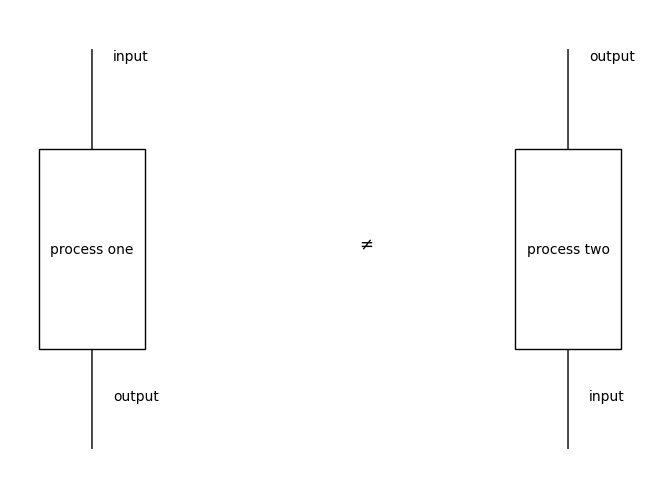

In [ ]:
from discopy.drawing import Equation

Equation(processOne, processTwo, symbol='$\\neq$').draw()

# Abstract Processes

A process might be recognised as a *kind* of some more abstract process.
For example, a *sink* is something that takes an input and returns no output.
The concept of *delete* can be conceived as a kind of sink.
        
Similarly, there is the general concept to `duplicate` an object, the computational concept to `copy` a file and the physical concept to `split` some material.

Below we define boxes for `duplicate` and `sink` using lambda functions then use them to define analogous processes with different names.
    
For `sink` a lambda function is used that takes a thing and its name and returns a box.
Note that the box takes that thing and returns the empty type `Ty()` --- this can be thought of as representing nothing or null.

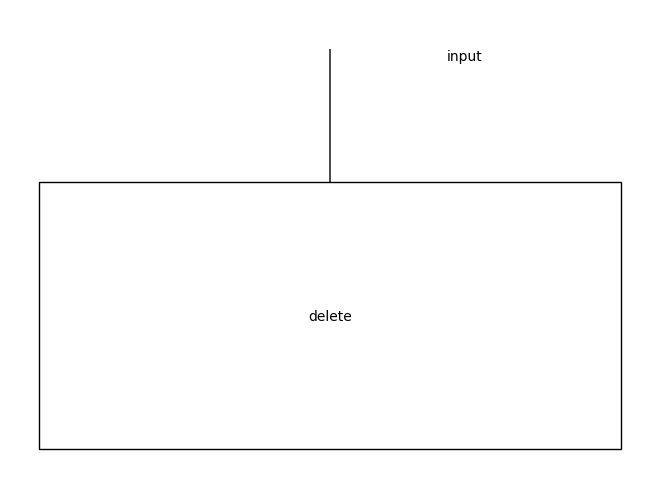

In [ ]:
sink = lambda name, thing: Box(name, thing, Ty())

delete = sink('delete', input)

delete.draw()

For `duplicate` the strategy is the same.

The box takes a thing as input and returns two versions of the same thing.
Note: previously the `@` operator was used on boxes themselves but here it is used on the types.

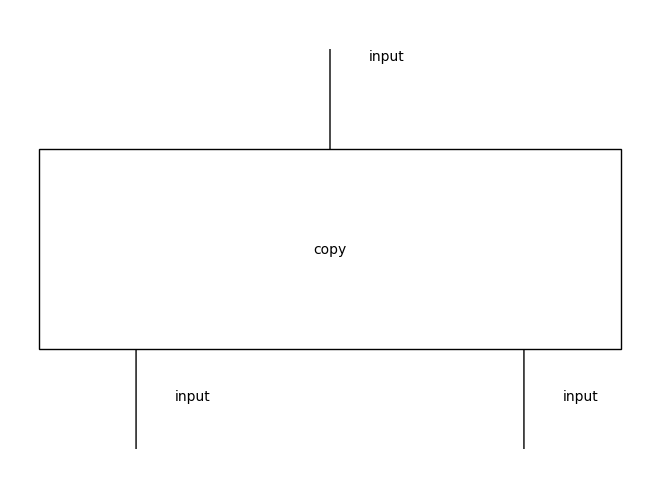

In [ ]:
duplicate = lambda name, thing: Box(name, thing, thing @ thing)

copy = duplicate('copy', input)
split = duplicate('split', input)

copy.draw()

How do we represent the useless operation of copying something then deleting both copies?

```bash
    cp myNewPoem.txt myPoemCopyForFriends.txt # optimism
    rm myNewPoem.txt myPoemCopyForFriends.txt # fear
```

We compose what we have designed already.

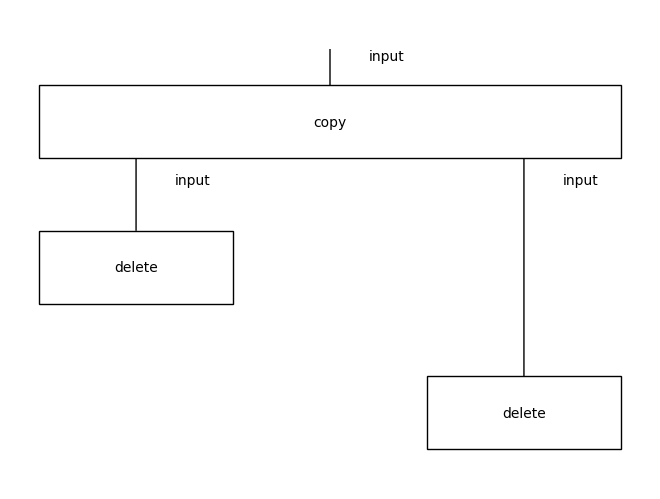

In [ ]:
(copy >> delete @ delete).draw()

This opens the possibility of crafting a well-defined and reusable set of objects and processes for representing our domain of interest.

# Granularity and Analogy

I mentioned earlier that DisCoPy is based on category theory but then skillfully avoided the subject. Category theory is all about abstraction. It has interested computer scientists for this very reason. Programmers are practitioners of abstraction and some category theorists have suggested that category theory could be a very powerful tool for representing complex software and reasoning about its design.

In some ways category theory is simple:

> Everything is either a box or an arrow

However, it gets pretty mind-bending.

One of the first topics that confused people is the `functor`. This is often explained intuitively as a way to "zoom in" or "zoom out". Interestingly, it is also suggested as a way to find **analogies** between systems. For simplicity, I want to focus on the functor-as-zooming idea.

To make this obvious I'm going to do a little obfuscation and give `Functor` the alias `Zoom`. I don't want your mind to wander on the meaning of `Functor` — I want you just think about it as a "zoom-controller" for now.

I'm also going to import the `Id` class. This is quiet boring but also really important. It allows us to take a thing and not do anything with it. We will use this in an upcoming example.

In [ ]:
from discopy.symmetric import Functor as Zoom
from discopy.symmetric import Id

Now I'm going to define two systems:

- High-level
- Low-level

Then we are going to use `Zoom` to move between the higher and lower levels.

<div class="alert alert-block alert-info">
<b>Note on the C4 model:</b></br> 
If you are familiar with the C4 framework for defining architectural diagrams this idea might seem familiar.
I show one case of zooming-in here, but multiple zooms could be defined to establish a hierarchy of diagrams.
If you know C4 think of the following example as going from a <strong>system</strong> to a <strong>container</strong> representation.
Remember, however, that there is nothing stopping use creating <strong>component</strong> and </strong>code</strong> levels if we want.
At some point if we wanted another level in this hierarchy it would be up to us to define it.
</div>

In [ ]:
# define the things to be processed
inA, inB, inC = Ty('A'), Ty('B'), Ty('C')

# define the high level process
high = Box('high-level', inA @ inB @ inC, inC) # three go in, one goes out

# define the low level implementation
killAB = sink('kill', inA @ inB) # sub-process: two get killed and don't return
leaveC = Id(inC) # sub-process: one passes right through

# parrallelize the implementation
low =  killAB @ leaveC

# define the mapping from one level to the next
# ob is for changing the names of types when we zoom (we leave them the same in this example)
# ar is for changing the boxes (we are changing from a high-level to a low-level representation)
zoomToLowerLevel = Zoom(
    ob=lambda x: x,
    ar={high: low}
)

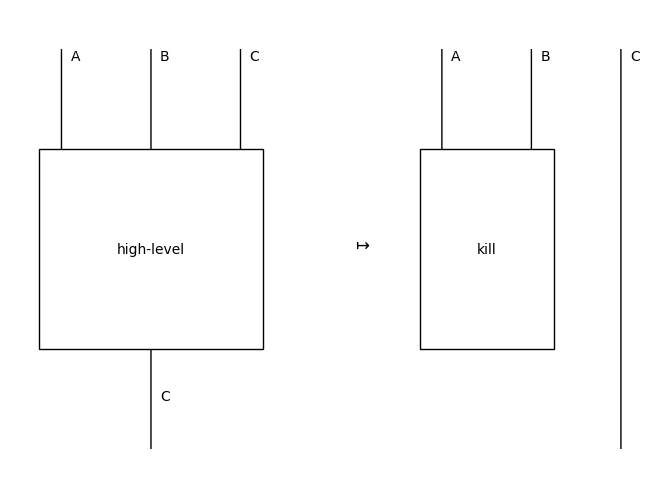

In [ ]:
Equation(high, zoomToLowerLevel(high), symbol='$\\mapsto$').draw()

We have defined two diagrams, each representing a different level of abstraction.

We have also defined a mapping between the two levels.

## What is a functor

We can define systems using arrows and boxes. These systems can be concrete or conceptual:

- Concrete: chemical reactions, software interfaces, manufacturing processes
- Conceptual: mathematical functions, power relations, analogies

We can also draw arrows **between different systems**. Think about these examples:

- An arrow that defines the translation between a sentence in English and a sentence in French
- An arrow that defines the analogy between a recipe and an algorithm, or between a recipe and a how-to
- An arrow that defines the relationship between a software interface and its implementation
- An arrow that defines the transition between a popular description and a technical description
- An arrow that defines the analogy between documentation and coding workflows (docs-as-code)

To establish an arrow (or multiple arrows) between system requires careful analysis and some rigidity.
We might need to fight our Python program and that fight could teach us something about our mental model.

# Conclusion

## The good

- Diagrams can be designed and rendered in Python, a familiar language that can be used in automated build tasks
- No 3rd party tooling or infrastructure is needed other than a Python interpreter
- Can accomodate a particular model (e.g., C4) and domain (e.g., software) while not being restricted to them
- Concepts are based on the rigid yet massively generalisable framework of category theory, which will outlive us and our software
- Text, code and diagrams can be combined in notebooks (`.ipynb`) that have native support on GitHub and Sphinx

## The bad

- Requires some willingess to use Python and experience the friction of coding a diagram
- DisCoPy is not particularly targeted at product documentation, so documentation-specific features may not be developed
- Options for styling diagrams are potentially quiet limited

# Resources

- [DisCoPy docs](https://docs.discopy.org/en/main/): the QNLP Tutorial in particular has some wonderful cooking examples.
- [CatLab docs](https://algebraicjulia.github.io/Catlab.jl/dev/): there is a similar implementation written for the Julia language that has some additional features. 
- [Mascarpone blog](https://graphicallinearalgebra.net/2015/05/06/crema-di-mascarpone-rules-of-the-game-part-2-and-diagrammatic-reasoning/): a lovely blog that talks through (another) cooking example using category theory
- [An Invitation to Category Theory](https://www.amazon.co.uk/Invitation-Applied-Category-Theory-Compositionality/dp/1108711820/ref=asc_df_1108711820/?tag=googshopuk-21&linkCode=df0&hvadid=697250157571&hvpos=&hvnetw=g&hvrand=16797333694321757682&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=1007835&hvtargid=pla-667246024944&psc=1&mcid=5bda122e9c0b3b9b8e172e5fe1c9bfec&th=1&psc=1&gad_source=1): book by category theorist David Spivak that is the best introduction I found on the subject and includes some interesting examples ranging from chemistry to software
- [widip](https://github.com/colltoaction/widip): an interactive environment built using DisCoPy that generates diagrams from `.yaml` files